<a href="https://colab.research.google.com/github/lmaMater/ITMO-Physics-Modeling/blob/main/model2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Движение частицы в поле плоского конденсатора.

Постановка задачи:

Частица влетает в поле конденсатора параллельно пластинам вдоль оси конденса-
тора. Частица имеет массу m и заряд q (знак не определен). Под действием поля
конденсатора частица отклоняется к одной из пластин (в зависимости от знака
заряда) и к концу пути попадает на неё. Координату, где упала частица мож-
но измерить. Известны также расстояние между пластинами и напряжение на
конденсаторе.

Создать модель поведения частицы с возможностью изучения её
траектории в зависимости от изменяемых параметров системы (масса, знак и
модуль заряда частицы, расстояние между пластинами конденсатора, а также
другие параметры являются входными данными для задачи). Определить закон,
по которому изменяется траектория движения частицы. Учесть влияние силы
тяжести на частицу и визуализировать траекторию движения частицы в виде
графика.

Договоримся, что верхняя пластина заряжена "+", а нижняя "-" так, чтобы вектор напряженности электрического поле E был направлен от верхней пластины к нижней.
Далее введем оси Ox и Oy так, чтобы пластины конденсатора были параллельны Ox и находились на расстоянии l/2 от нее, Oy перпендикулярна Ox и направлена вверх(от нижней пластины к верхней), частица начинает движение из точки (0, 0) параллельно пластинам вдоль направления Ox.

Пользователь вправе задать такие изначальные данные для задачи, как начальную скорость, массу частицы, заряд частицы, напряженность поля и расстояние между пластинами.


Рассмотрим отдельно движение тела по каждой из осей:

Ox: по горизонтали тело равномерно движется с начальной скоростью, тогда координату тела x  в момент времени t можно рассчитать как: 

x_t = v_0 * t

Oy: по вертикали тело движется равноускоренно под действием силы тяжести и силы электрического поля F_э. Тогда по II закону Ньютона, спроецировав на Oy получим:

 -mg -+ F_э = -+ma

Зная, что F_э = qE, выражаем ускорение по y как:

 a = (mg +- qE) / m

 И полный закон движения по y будет выглядеть как:

 y_t = v_0 * t + at^2 / 2 = 0 + (mg+-qE)t^2 / 2m

Реализуем построение модели с помощью библиотеки matplotlib для Python:

Результат готов!


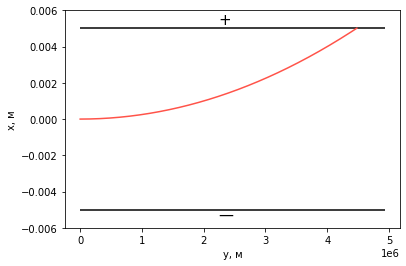

In [ ]:
import matplotlib.pyplot as plt

g = 9.80665  # сила тяжести
col = '#ff5349'


#  функции для расчета координат по x и y соответственно
def x_coordinate(v, t):
    return v * t


def y_coordinate(m, q, E, t):
    global g
    return ((-(m * g + q * E)) * t ** 2) / (2 * m)

# default
v_0 = 1e10  # м/c
m = 1e-15  # кг
q = -1e-14  # в
E = 5000  # Н/м
l = 1e-2  # м

'''
print('Введите начальную скорость v_0, м:')
v_0 = int(input())
print('Введите массу частицы m, кг:')
m = int(input())
print('Введите заряд частицы Кл:')
q = int(input())
print('Введите напряженность поля, Н/м:')
E = int(input())
print('Введите расстояние между пластинами, м:')
l = int(input())
'''

#  Если сумма силы тяжески и силы эл. поля равна нулю,
#  то частица будет бесконечно двигаться параллельно Ox
if m * g == q * E:
    print('Невозможно определить координату падения частицы')
    exit(-1)

interval = 1e-6  # интервал на Ox

cur_t, x, y = 0, [], []
while abs(y_coordinate(m, q, E, cur_t)) < l / 2:
    x += [x_coordinate(v_0, cur_t)]
    y += [y_coordinate(m, q, E, cur_t)]
    cur_t += interval

x += [x_coordinate(v_0, cur_t)]
y += [y_coordinate(m, q, E, cur_t)]

# ограничиваем ось Oy
plt.ylim(-1.2 * (l / 2), 1.2 * (l / 2))

#  пластины конденсатора
plt.hlines(l / 2, 0, 1.1 * x[-1])
plt.hlines(-l / 2, 0, 1.1 * x[-1])
plt.text(x[-1] / 2, 1.05 * (l / 2), '+', fontsize=15)
plt.text(x[-1] / 2, 1.1 * (-l / 2), '—', fontsize=15)

#  оси
plt.ylabel('x, м')
plt.xlabel('y, м')

plt.plot(x, y, color=col)
#  plt.scatter(x, y, color=col) # точки


print('Результат готов!')
plt.show()


Моделирование выполнили Яруллин Степан и Михеев Альберт, группа M3101.